**Question 1**

In [2]:
#step 1: Import the necessary libraries

import pandas as pd
import urllib

#step 2: Import the dataset from https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
#step 3: Assign it to a variable called users

users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
#step 4: Discover what is the mean age per occupation

round(users.groupby('occupation').age.mean(),4)

occupation
administrator    38.7468
artist           31.3929
doctor           43.5714
educator         42.0105
engineer         36.3881
entertainment    29.2222
executive        38.7188
healthcare       41.5625
homemaker        32.5714
lawyer           36.7500
librarian        40.0000
marketing        37.6154
none             26.5556
other            34.5238
programmer       33.1212
retired          63.0714
salesman         35.6667
scientist        35.5484
student          22.0816
technician       33.1481
writer           36.3111
Name: age, dtype: float64

In [15]:
#step 5: Discover the Male ratio per occupation and sort it from the most to the least

maleratio=users.where(users.gender=='M').groupby(['occupation','gender']).gender.count()
total=users.groupby('occupation').gender.count()
ratio_per_occupation=round((maleratio/total)*100,4)
ratio_per_occupation.sort_values(ascending=False)

occupation     gender
doctor         M         100.0000
engineer       M          97.0149
technician     M          96.2963
retired        M          92.8571
programmer     M          90.9091
executive      M          90.6250
scientist      M          90.3226
entertainment  M          88.8889
lawyer         M          83.3333
salesman       M          75.0000
educator       M          72.6316
student        M          69.3878
other          M          65.7143
marketing      M          61.5385
writer         M          57.7778
none           M          55.5556
administrator  M          54.4304
artist         M          53.5714
librarian      M          43.1373
healthcare     M          31.2500
homemaker      M          14.2857
Name: gender, dtype: float64

In [13]:
#step 6: For each occupation, calculate the minimum and maximum ages

users.groupby(['occupation']).age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [14]:
#step 7. For each combination of occupation and sex, calculate the mean age

users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [22]:
#step 8. For each occupation present the percentage of women and men

occupation_of_gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
total_occupation_count = users.groupby(['occupation']).count()
occupation_gender = (occupation_of_gender.div(total_occupation_count, level = 'occupation'))*100
occupation_gender.loc[:, 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

**Question 2** **EURO TEAMS**

In [23]:
#step 1: Import the necessary libraries

import pandas as pd
import urllib

#step 2: Import the dataset from https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
#step 3. Assign it to a variable called euro12

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [26]:
#step 4: Select only the Goal column

euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [37]:
#step 5: How many team participated in the Euro2012?

euro12['Team'].count()

16

In [54]:
#step 6: What is the number of columns in the dataset?

print('Total number of columns in the dataset is',len(euro12.columns))

Total number of columns in the dataset is 35


In [57]:
#step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

dataframe=euro12[['Team','Yellow Cards','Red Cards']]
discipline=pd.DataFrame(dataframe)
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [58]:
#step 8: Sort the teams by Red Cards, then to Yellow Cards

Teams=discipline.sort_values(by=['Red Cards','Yellow Cards'])
print (Teams)

                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


In [60]:
#step 9: Calculate the mean Yellow Cards given per Team

Teams.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [61]:
#step 10: Filter teams that scored more than 6 goals

euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [62]:
#step 11: Select the teams that start with G

euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [63]:
#step 12: Select the first 7 columns

euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [64]:
#step 13: Select all columns except the last 3

euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [65]:
#step 14: Present only the Shooting Accuracy from England, Italy and Russia

football_team = euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]
print (football_team)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


**Question 3** **Housing**

In [68]:
#Step 1: Import the necessary libraries

import numpy as np
import pandas as pd
import random

In [70]:
#Step 2: Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000

firstseries=pd.Series(np.random.randint(1,4,size=100))
secondseries=pd.Series(np.random.randint(1,3,size=100))
thirdseries=pd.Series(np.random.randint(10000,30000,size=100))

In [75]:
#step 3: Create a DataFrame by joinning the Series by column

df=pd.DataFrame({'Series 1':firstseries,'Series 2':secondseries,'Series 3':thirdseries})
df

,Series 1,Series 2,Series 3
0,2,1,20261
1,1,2,14539
2,2,2,15973
3,3,1,20454
4,3,2,28151
...,...,...,...
95,3,1,10039
96,1,2,12191
97,1,1,26000
98,1,2,14866


In [86]:
#step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter

df = df.rename(columns={'Series 1':'bedrs', 'Series 2':'bathrs', 'Series 3':'price_sqr_meter'})
df

,bedrs,bathrs,price_sqr_meter
0,2,1,20261
1,1,2,14539
2,2,2,15973
3,3,1,20454
4,3,2,28151
...,...,...,...
95,3,1,10039
96,1,2,12191
97,1,1,26000
98,1,2,14866


In [108]:
#step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn=pd.concat([firstseries,secondseries,thirdseries],axis=0)
bigcolumn

0         2
1         1
2         2
3         3
4         3
      ...  
95    10039
96    12191
97    26000
98    14866
99    29549
Length: 300, dtype: int32

In [ ]:
#step 6: Ops it seems it is going only until index 99. Is it true?
Yes it is going only until index 99.

In [111]:
#step 7. Reindex the DataFrame so it goes from 0 to 299

new_dataframe = df_new.reset_index(drop=True)
new_dataframe.reset_index()
new_dataframe.reindex(index=range(0,299))

0      2120261
1      1214539
2      2215973
3      3120454
4      3228151
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

**Question 4** **Wind Statistics**

In [3]:
#step 1: Import the necessary libraries

import numpy as nump
import pandas as pd

#step 2: Import the dataset from the attached file wind.txt
data=pd.read_fwf('wind.txt')

In [4]:
#step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [5]:
#step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

data["Date"] = nump.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [6]:
#step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

rightdates = data.set_index("Date")
rightdates.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [15]:
#step 6: Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

print(data.isnull().values.ravel().sum())

31


In [21]:
#step 7: Compute how many non-missing values there are in total

nonmissingvalues=rightdates.count()
print("Total non-missing values are :",nonmissingvalues.sum())

Total non-missing values are : 78857


In [22]:
#step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

rightdates.mean()

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [26]:
#step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

Minimum=rightdates.min()
Maximum=rightdates.max()
Meanwindspeed=rightdates.mean()
Standarddeviations=rightdates.std()
var=[Minimum,Maximum,Meanwindspeed,Standarddeviations]
windspeeds=["Minimum","Maximum","Meanwindspeed","Standarddeviations"]
loc_stats= pd.DataFrame(var,windspeeds)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Minimum,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Maximum,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Meanwindspeed,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Standarddeviations,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [37]:
#step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

Minimum=rightdates.min()
Maximum=rightdates.max()
Meanwindspeed=rightdates.mean()
Standarddeviations=rightdates.std()
var=[Minimum,Maximum,Meanwindspeed,Standarddeviations]
windspeeds=["Minimum","Maximum","Meanwindspeed","Standarddeviations"]
day_stats= pd.DataFrame(var,windspeeds)
day_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Minimum,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Maximum,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Meanwindspeed,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Standarddeviations,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [45]:
#step 11: Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

January_data = rightdates[rightdates.index.month == 1]
print (January_data.mean())

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [49]:
#step 12: Downsample the record to a yearly frequency for each location.

rightdates.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [50]:
#step 13: Downsample the record to a monthly frequency for each location.

rightdates.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [51]:
#step 14: Downsample the record to a weekly frequency for each location.

rightdates.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [57]:
#step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

year = rightdates[rightdates.index.year == 1961]
all_locations = rightdates.resample('W').mean().apply(lambda x: x.describe())
print (all_locations)

              RPT         VAL         ROS         KIL         SHA         BIR  \
count  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
mean    12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
std      3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   
min      3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
25%      9.884286    8.277857    9.613929    4.742857    8.248571    5.211071   
50%     12.291429   10.486429   11.490000    6.165714   10.254286    6.933571   
75%     14.547143   12.757857   13.457143    7.584286   12.627143    8.842500   
max     24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   

              DUB         CLA         MUL         CLO         BEL         MAL  
count  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
mean     9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
std      3.308180    2.853029 

**Question 5**

In [59]:
#step1: Import the necessary libraries

import pandas as pd
import numpy as np

#step 2: Import the dataset from this address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv".
#step 3. Assign it to a variable called chipo.

chipo=pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep="\t")

In [60]:
#step 4: See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [61]:
#step 5: What is the number of observations in the dataset?

chipo.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

In [62]:
#step 6: What is the number of columns in the dataset?

chipo.shape[1]

5

In [63]:
#step 7: Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [64]:
#step 8: How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [65]:
#step 9: Which was the most-ordered item?

most_ordered_item=chipo.groupby(['item_name'])['quantity'].sum()
print(most_ordered_item.idxmax())

Chicken Bowl


In [66]:
#step 10: For the most-ordered item, how many items were ordered?

most_ordered_item.max()

761

In [73]:
#step 11: What was the most ordered item in the choice_description column?

most_ordered_item = chipo.groupby('choice_description').sum().sort_values(by=['quantity'],ascending = False)
most_ordered_item.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [74]:
#step 12: How many items were orderd in total?

chipo.quantity.sum()

4972

In [77]:
#Step 13

#• Turn the item price into a float
chipo.item_price.str.slice(1).astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [80]:
#• Check the item price type

chipo.item_price.dtype

dtype('O')

In [81]:
#• Create a lambda function and change the type of item price

chipo['item_price']=chipo['item_price'].apply(lambda x: x.replace('$', '')).astype('float')
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [82]:
#• Check the item price type

print(chipo.item_price.dtype)

float64


In [84]:
#step 14: How much was the revenue for the period in the dataset?

revenue_for_the_period = (chipo['item_price'] * chipo['quantity'])
revenue_for_the_period.sum()

39237.02

In [85]:
#step 15: How many orders were made in the period?

chipo.order_id.value_counts().count()

1834

In [90]:
#step 16: What is the average revenue amount per order?

chipo['average_revenue'] = chipo['quantity'] * chipo['item_price']
order = chipo.groupby('order_id').sum()
round(order.mean()['average_revenue'],5)

21.39423

In [91]:
#Step 17: How many different items are sold?

chipo.item_name.value_counts().count()

50

**Question 6**

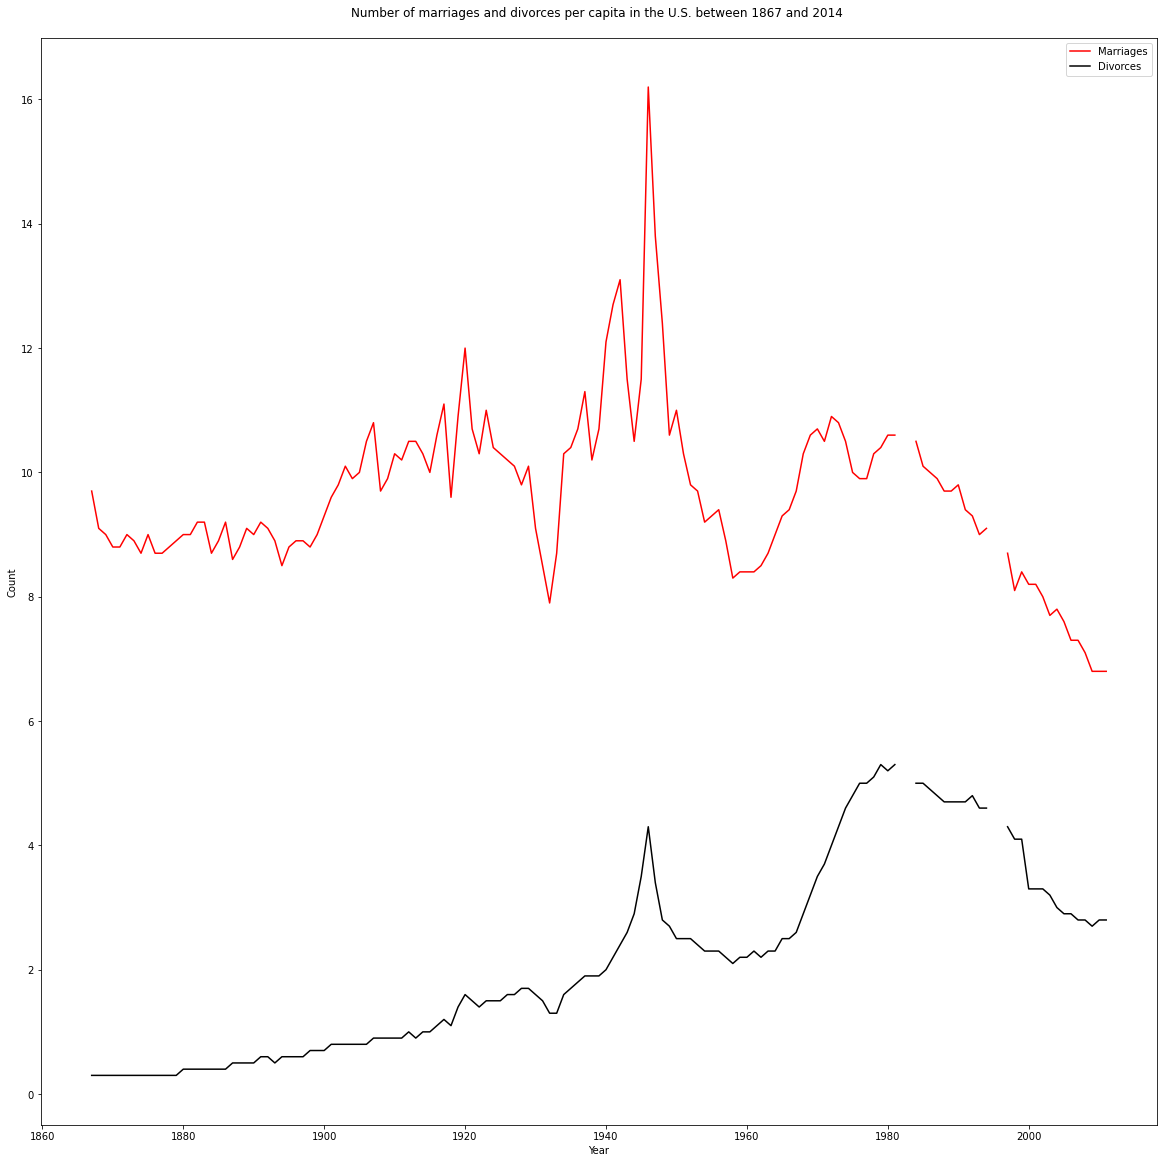

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
marriages_divorces=pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriages_divorces.head()
plt.figure(figsize=(20,20))
Year=marriages_divorces.Year.values
Marriage=marriages_divorces.Marriages_per_1000.values
Divorce=marriages_divorces.Divorces_per_1000.values
plt.plot(Year,Marriage,label='Marriages', color = 'Red')
plt.plot(Year,Divorce,label='Divorces', color = 'Black')
plt.title('Number of marriages and divorces per capita in the U.S. between 1867 and 2014 \n')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

**Question 7**

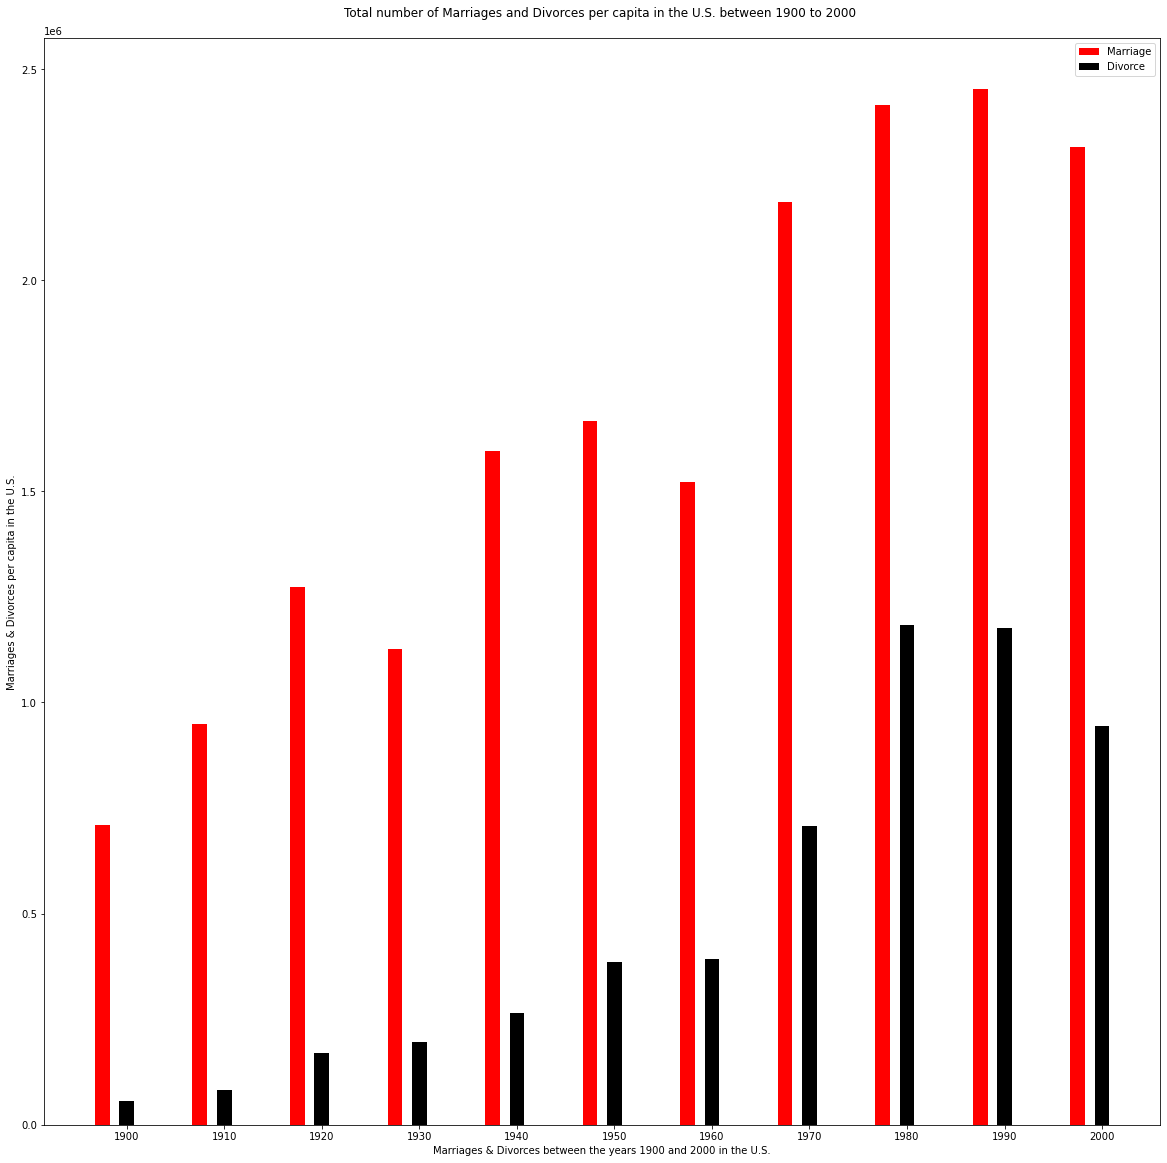

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
marriages_divorces=pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriages_divorces.tail()
plt.figure(figsize=(20,20))
Marriage = [709000, 948000, 1274000, 1127000, 1596000, 1667000, 1523000, 2185802, 2413896, 2451774, 2315000]
Divorce = [56000, 83000, 171000, 196000, 264000, 385000, 393000, 708000, 1184175, 1175851,944000]
X = np.arange(len(Marriage))
plt.bar(X, Marriage, width = 0.15, color = 'Red')
plt.bar(X + 0.25, Divorce, width = 0.15, color = 'Black')
plt.xticks([i + 0.25 for i in range(11)], ['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000'])
plt.title("Total number of Marriages and Divorces per capita in the U.S. between 1900 to 2000 \n")
plt.xlabel("Marriages & Divorces between the years 1900 and 2000 in the U.S.")
plt.ylabel("Marriages & Divorces per capita in the U.S.")
plt.legend(['Marriage', 'Divorce'])
plt.show()

**Question 8**

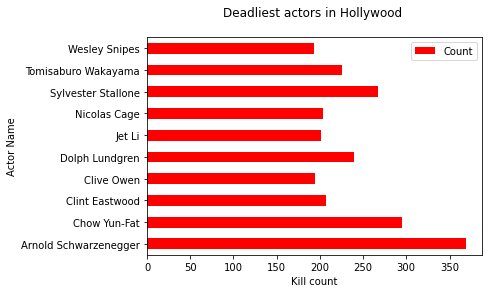

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
hollywood_actors=pd.read_csv('actor_kill_counts.csv')
Deadliest_actor_data=hollywood_actors.sort_values(by='Count')
hollywood_actors.plot.barh(x='Actor', y='Count', color="Red")
plt.xlabel("Kill count")
plt.ylabel("Actor Name")
plt.title("Deadliest actors in Hollywood \n ")
plt.show()

**Question 9**

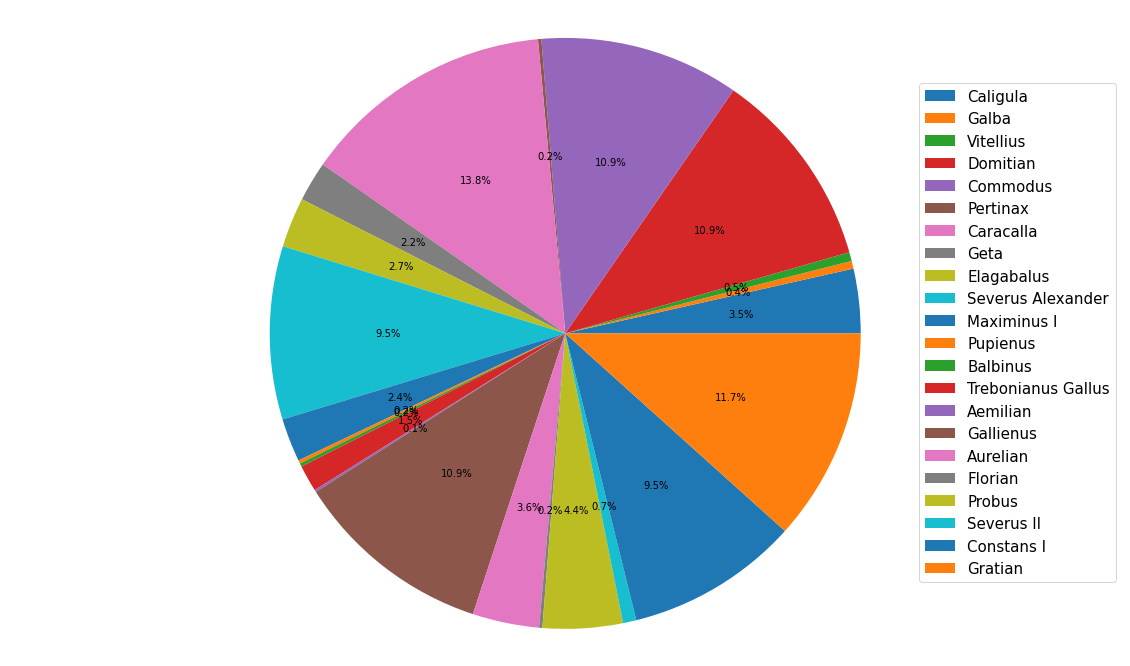

               Emperor  Length_of_Reign Cause_of_Death
2             Caligula             4.83   Assassinated
5                Galba             0.58   Assassinated
7            Vitellius             0.67   Assassinated
10            Domitian            15.00   Assassinated
17            Commodus            15.00   Assassinated
18            Pertinax             0.25   Assassinated
21           Caracalla            19.00   Assassinated
22                Geta             3.00   Assassinated
24          Elagabalus             3.75   Assassinated
25   Severus Alexander            13.00   Assassinated
26         Maximinus I             3.25   Assassinated
29            Pupienus             0.25   Assassinated
30            Balbinus             0.25   Assassinated
35  Trebonianus Gallus             2.00   Assassinated
36            Aemilian             0.16   Assassinated
38           Gallienus            15.00   Assassinated
41            Aurelian             5.00   Assassinated
43        

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
roman_emperors=pd.read_csv('roman-emperor-reigns.csv')
emperors_Cause_of_Death = roman_emperors[roman_emperors.Cause_of_Death == 'Assassinated']
emperor = emperors_Cause_of_Death.Emperor 
emperor_length_of_reign = emperors_Cause_of_Death.Length_of_Reign
plt.figure(figsize=(20,12))
plt.pie(emperor_length_of_reign, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(emperor, fontsize = 15, loc="right")
plt.show()
print (emperors_Cause_of_Death)


**Question 10**

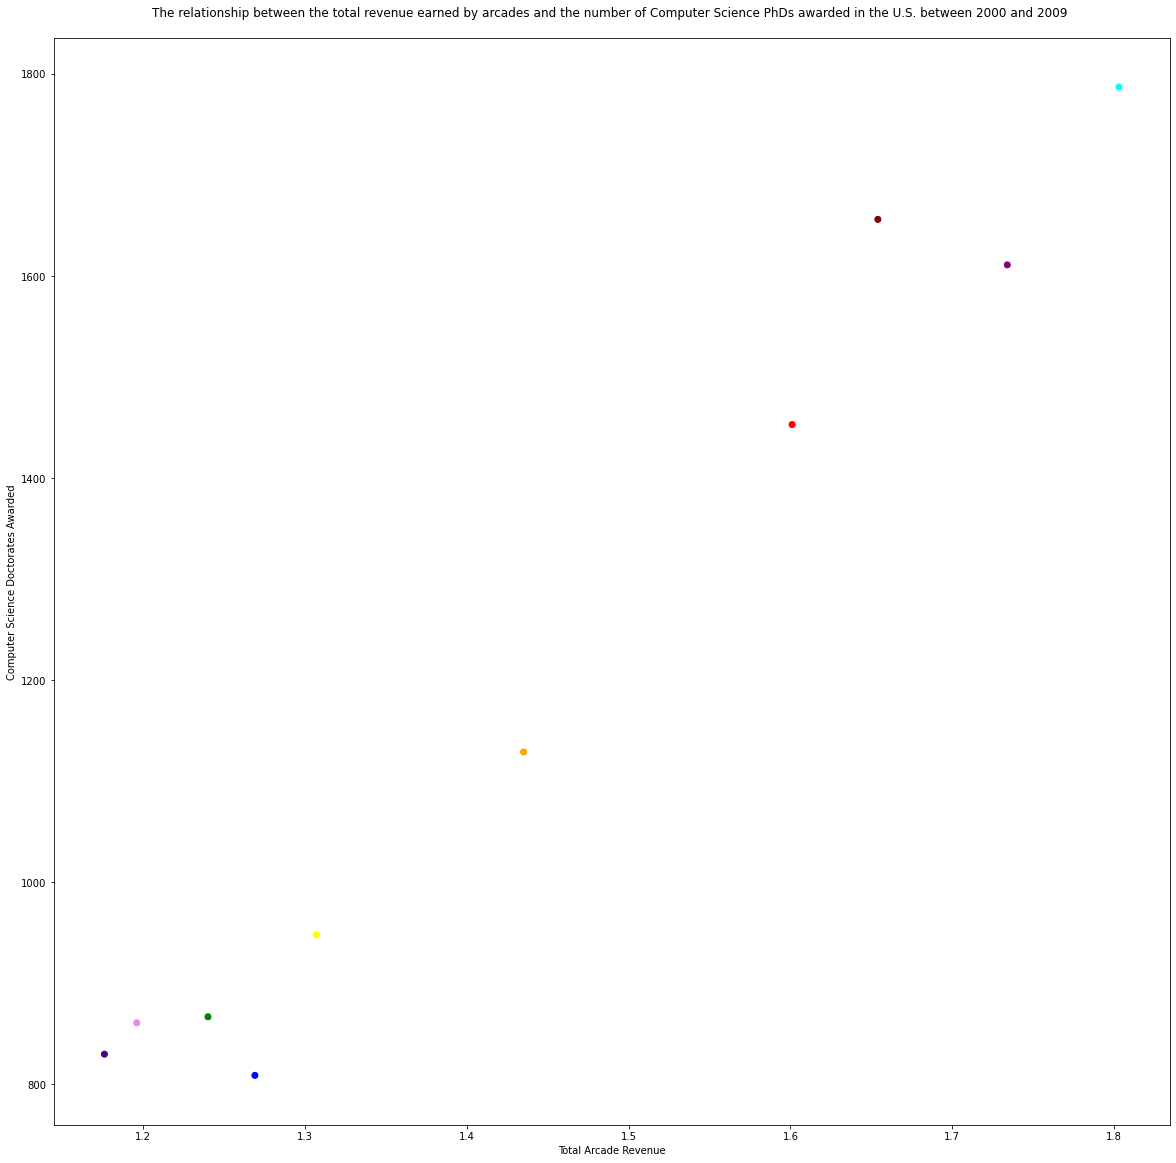

In [171]:
import matplotlib.pyplot as plt
import pandas as pd
total_revenue_earned=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
plt.figure(figsize=(20,20))
colors=["Violet","Indigo","Blue","Green","Yellow","Orange","Red","Maroon","Cyan","purple"]
plt.title("The relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009 \n")
plt.xlabel('Total Arcade Revenue')
plt.ylabel('Computer Science Doctorates Awarded')
plt.scatter(total_revenue_earned['Total Arcade Revenue (billions)'],total_revenue_earned['Computer Science Doctorates Awarded (US)'], color = colors)
plt.show()